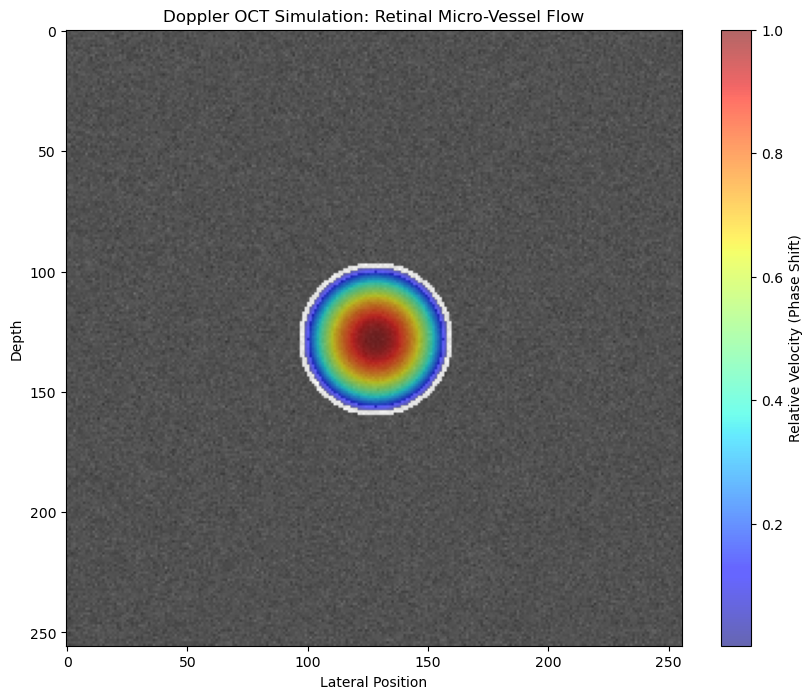

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Simulation Grid
nx, nz = 256, 256 # Lateral x Depth
structural_img = np.zeros((nz, nx))
velocity_map = np.zeros((nz, nx))

# 2. Create a Blood Vessel (Circle at the center)
center_x, center_z = 128, 128
radius = 30
z_grid, x_grid = np.ogrid[:nz, :nx]
dist_from_center = np.sqrt((x_grid - center_x)**2 + (z_grid - center_z)**2)

# 3. Generate Structural Data (The Vessel Wall)
# A ring representing the tissue interface
vessel_wall = (dist_from_center > radius-2) & (dist_from_center < radius+2)
structural_img[vessel_wall] = 1.0
# Add some background "tissue" noise
structural_img += np.random.normal(0, 0.05, structural_img.shape)

# 4. Generate Doppler Data (The Flow)
# Parabolic flow: fastest in the center, zero at the walls
inside_vessel = dist_from_center < radius
# Velocity formula for laminar flow: v = v_max * (1 - (r/R)^2)
velocity_map[inside_vessel] = 1.0 * (1 - (dist_from_center[inside_vessel]/radius)**2)

# 5. Visualize the "Overlay" (Medical Style)
plt.figure(figsize=(10, 8))

# Show the structural scan in grayscale
plt.imshow(structural_img, cmap='gray', alpha=0.8)

# Overlay the Doppler flow in a "Heat" map (Red/Blue)
# Masking the zeros so we only see colors inside the vessel
masked_velocity = np.ma.masked_where(velocity_map == 0, velocity_map)
plt.imshow(masked_velocity, cmap='jet', alpha=0.6)

plt.title("Doppler OCT Simulation: Retinal Micro-Vessel Flow")
plt.xlabel("Lateral Position")
plt.ylabel("Depth")
plt.colorbar(label="Relative Velocity (Phase Shift)")
plt.show()